<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (2)

1) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일을 읽어와 titanic 데이터프레임을 선언하세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
- 1-3) PassengerId, Name, Ticket, Cabin 열을 한 번에 제거하세요.

In [63]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [64]:
titanic.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


2) 상위 5개 행을 확인하세요.

In [65]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


3) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 3-1) Age 열 결측치를 Age 열 평균으로 채우세요.
- 3-2) Embarked 열 결측치를 'S'로 채우세요.
- 3-3) 각 열에 결측치가 남아있는지 확인하세요.

In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [67]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Embarked'].fillna('S', inplace=True)
# titanic['Embarked'].mode()[0] 을 s 대신 넣어도됨

titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
titanic['Embarked'].mode() # 최빈값

0    S
dtype: object

In [69]:
titanic['Embarked'].mode()[0]

'S'

4) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 4-1) groupby 메서드를 사용해 Pclass 별 탑승자 수를 집계하여 tmp 데이터프레임으로 선언하세요.
    - 탑승자 수는 Survived 열 처럼 결측치가 없는 열의 count()로 집계 가능합니다.
- 4-2) tmp 데이터프레임의 Survived 열 이름을 Count로 변경하세요.
- 4-3) tmp 데이터프레임을 막대 그래프로 시각화해 확인하세요.

In [70]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [71]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [84]:
tmp=titanic.groupby(by='Pclass', as_index=False)[['Survived']].count() 
tmps

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [ ]:
tmp=titanic.groupby(by='Pclass', as_index=False).sum() ## 생존자수
tmp

In [74]:
# tmp.rename(columns={'Survived':'Count'}, inplace=True)
tmp.columns=['Pclass','Count']
tmp

,Pclass,Count
0,1,216
1,2,184
2,3,491


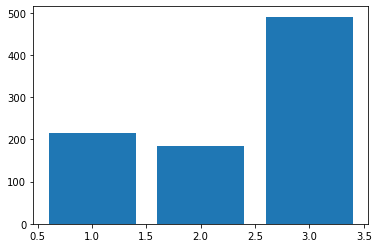

In [81]:
#1
plt.bar(tmp['Pclass'], height=tmp['Count'])
plt.show()

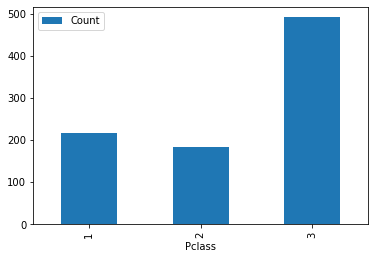

In [83]:
#2
# tmp.plot(kind='bar')
tmp.plot(kind='bar', x='Pclass')
plt.show()

5) Pclass, Sex, Embarked 열을 한 번에 가변수화하세요. 단, 다중공선성 문제가 없도록 범주값 개수보다 하나 적은 수의 열이 만들어지게 하세요.

In [29]:
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [53]:
titanic = pd.get_dummies(titanic, columns=['Pclass','Sex','Embarked'], drop_first=True)
titanic

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,1,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,1,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0,1
888,0,29.699118,1,2,23.4500,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,0,1,0,0
